# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

**Instructions:**
To perform the MD simulation use:

`./MolecularDynamics_NVE/MolecularDynamics input_file`

To run a full simulation of the three phases run `all_phases.sh`

In [1]:
import numpy as np
from numpy import average as avg
import matplotlib.pyplot as plt

In [2]:
temp_g = np.loadtxt("MolecularDynamics_NVE/gas_phase/output_temp.dat")
kin_g = np.loadtxt("MolecularDynamics_NVE/gas_phase/output_ekin.dat")
pot_g = np.loadtxt("MolecularDynamics_NVE/gas_phase/output_epot.dat")
tot_g = np.loadtxt("MolecularDynamics_NVE/gas_phase/output_etot.dat")

temp_l = np.loadtxt("MolecularDynamics_NVE/liquid_phase/output_temp.dat")
kin_l = np.loadtxt("MolecularDynamics_NVE/liquid_phase/output_ekin.dat")
pot_l = np.loadtxt("MolecularDynamics_NVE/liquid_phase/output_epot.dat")
tot_l = np.loadtxt("MolecularDynamics_NVE/liquid_phase/output_etot.dat")

temp_s = np.loadtxt("MolecularDynamics_NVE/solid_phase/output_temp.dat")
kin_s = np.loadtxt("MolecularDynamics_NVE/solid_phase/output_ekin.dat")
pot_s = np.loadtxt("MolecularDynamics_NVE/solid_phase/output_epot.dat")
tot_s = np.loadtxt("MolecularDynamics_NVE/solid_phase/output_etot.dat")

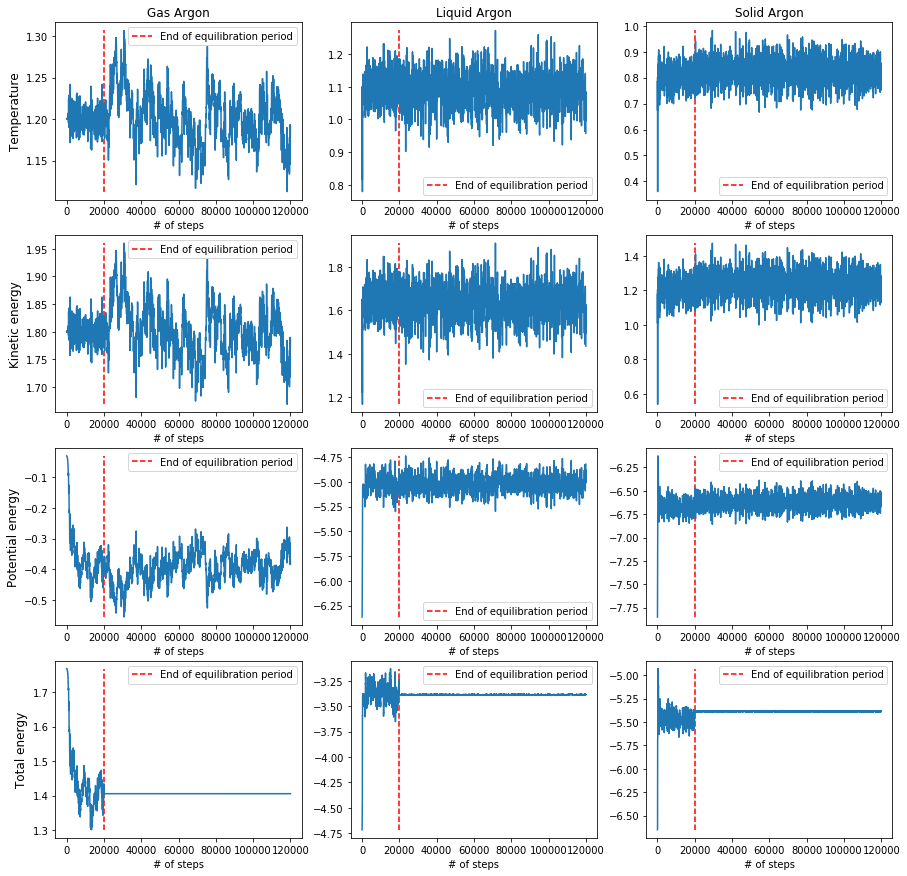

In [3]:
#Plots
x = np.arange(120000)
eq = 20000
sets = [[temp_g, kin_g, pot_g, tot_g], [temp_l, kin_l, pot_l, tot_l], [temp_s, kin_s, pot_s, tot_s]]
rows = ["Temperature", "Kinetic energy", "Potential energy", "Total energy"]
cols = ["Gas Argon", "Liquid Argon", "Solid Argon"]

fig, axes = plt.subplots(4, 3, figsize=(15,15))

i=0
for row in axes:
    j=0
    for col in row:
        col.plot(x, sets[j][i])
        col.vlines(eq, np.min(sets[j][i]), np.max(sets[j][i]), linestyle='dashed', color='r', label='End of equilibration period')
        col.set_xlabel("# of steps")
        col.legend()
        j += 1
    i += 1  
    
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size='large')

### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

### Exercise 04.3

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

### <span style="color:green"> Optional exercise</span>

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: istantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

In [7]:
#load and convert in (almost) SI units

s_temp, err_s_temp = np.loadtxt('MolecularDynamics_NVE/solid_phase/ave_temp.out', unpack=True)*120
s_kin, err_s_kin = np.loadtxt('MolecularDynamics_NVE/solid_phase/ave_ekin.out', unpack=True)*1.032
s_pot, err_s_pot = np.loadtxt('MolecularDynamics_NVE/solid_phase/ave_epot.out', unpack=True)*1.032
s_tot, err_s_tot = np.loadtxt('MolecularDynamics_NVE/solid_phase/ave_etot.out', unpack=True)*1.032
s_pres, err_s_pres = np.loadtxt('MolecularDynamics_NVE/solid_phase/ave_pres.out', unpack=True)*4.21*10**3

l_temp, err_l_temp = np.loadtxt('MolecularDynamics_NVE/liquid_phase/ave_temp.out', unpack=True)*120
l_kin, err_l_kin = np.loadtxt('MolecularDynamics_NVE/liquid_phase/ave_ekin.out', unpack=True)*1.032
l_pot, err_l_pot = np.loadtxt('MolecularDynamics_NVE/liquid_phase/ave_epot.out', unpack=True)*1.032
l_tot, err_l_tot = np.loadtxt('MolecularDynamics_NVE/liquid_phase/ave_etot.out', unpack=True)*1.032
l_pres, err_l_pres = np.loadtxt('MolecularDynamics_NVE/liquid_phase/ave_pres.out', unpack=True)*4.21*10**3

g_temp, err_g_temp = np.loadtxt('MolecularDynamics_NVE/gas_phase/ave_temp.out', unpack=True)*120
g_kin, err_g_kin = np.loadtxt('MolecularDynamics_NVE/gas_phase/ave_ekin.out', unpack=True)*1.032
g_pot, err_g_pot = np.loadtxt('MolecularDynamics_NVE/gas_phase/ave_epot.out', unpack=True)*1.032
g_tot, err_g_tot = np.loadtxt('MolecularDynamics_NVE/gas_phase/ave_etot.out', unpack=True)*1.032
g_pres, err_g_pres = np.loadtxt('MolecularDynamics_NVE/gas_phase/ave_pres.out', unpack=True)*4.21*10**3

In [5]:
avg_g_temp = avg(g_temp)
avg_g_kin = avg(g_kin)
avg_g_pot = avg(g_pot)
avg_g_tot = avg(g_tot)
avg_g_pres = avg(g_pres)

avg_l_temp = avg(l_temp)
avg_l_kin = avg(l_kin)
avg_l_pot = avg(l_pot)
avg_l_tot = avg(l_tot)
avg_l_pres = avg(l_pres)

avg_s_temp = avg(s_temp)
avg_s_kin = avg(s_kin)
avg_s_pot = avg(s_pot)
avg_s_tot = avg(s_tot)
avg_s_pres = avg(s_pres)

In SI units: ( using eV instead of J)

- $T = T^* $120K 
- $\rho = \rho^* \cdot \sigma^3/m$ = $\rho^*$/$\frac{0.34^3}{39.948*1.66}$kg/m^3 = $\rho^* / 5.93 \cdot 10^{-4}$kg/m^3
- $\epsilon = k_B\cdot $120 K = 1.654$\cdot 10^{-21}$ J = 1.032 meV
- $P = P^* \cdot \epsilon /\sigma^3$ = $P^* \cdot 1.654/0.34^3 \cdot 10^{6} Pa$ = $4.21 \cdot 10^{6}$Pa

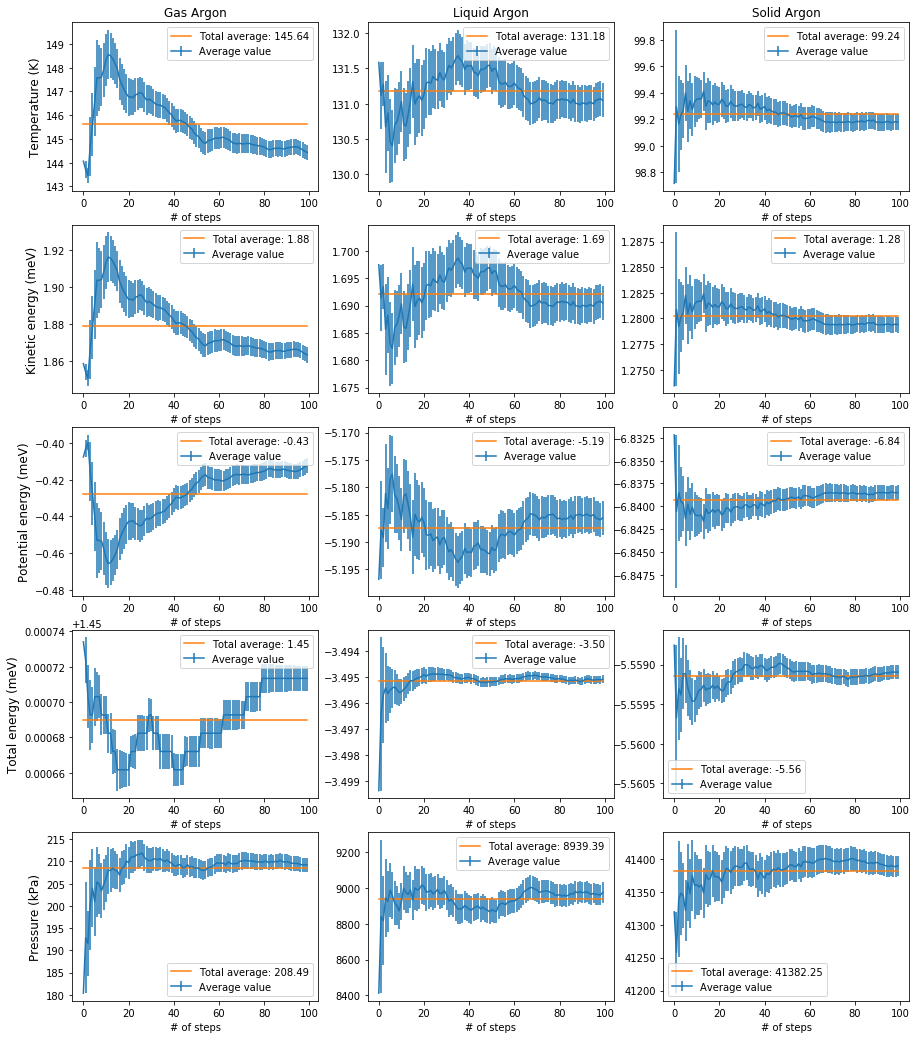

In [8]:
#Plots
x = [np.arange(100), np.arange(100), np.arange(100)]
sets = [[g_temp, g_kin, g_pot, g_tot, g_pres], [l_temp, l_kin, l_pot, l_tot, l_pres], [s_temp, s_kin, s_pot, s_tot, s_pres]]
errors = [[err_g_temp, err_g_kin, err_g_pot, err_g_tot, err_g_pres], [err_l_temp, err_l_kin, err_l_pot, err_l_tot, err_l_pres], [err_s_temp, err_s_kin, err_s_pot, err_s_tot, err_s_pres]]
avgs = [[avg_g_temp, avg_g_kin, avg_g_pot, avg_g_tot, avg_g_pres], [avg_l_temp, avg_l_kin, avg_l_pot, avg_l_tot, avg_l_pres], [avg_s_temp, avg_s_kin, avg_s_pot, avg_s_tot, avg_s_pres]]
rows = ["Temperature (K)", "Kinetic energy (meV)", "Potential energy (meV)", "Total energy (meV)", "Pressure (kPa)"]
cols = ["Gas Argon", "Liquid Argon", "Solid Argon"]

fig, axes = plt.subplots(5, 3, figsize=(15,18))

i=0
for row in axes:
    j=0
    for col in row:
        col.errorbar(x[j], sets[j][i], yerr=errors[j][i], label='Average value')
        col.plot(x[j], np.ones(len(x[j]))*avgs[j][i], label='Total average: {:.2f}'.format(avgs[j][i]))
        col.set_xlabel("# of steps")
        col.legend()
        j += 1
    i += 1  
    
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size='large')